In [ ]:
# https://amplitude.com/blog/churn-prediction

# <center> Python Programming </center>
## <center> AML 1214 - Group AAF </center>
## <center> Final Term Project - Machine Learning Classification Algorithm </center>

## <center> Expresso Customer Churn Prediction </center>

<left> 

**CONTEXT**

This data was imported from the zindi platform in the context of competition and here is the link to the competition

The objective of the competition is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from Expresso.

**ATTRIBUTES**

- user_id: Unique identifier for each user
- REGION: The region where the user is located
- TENURE: The length of time (in months) that the user has been a customer of the telecom company
- MONTANT: The amount of money (in CFA francs) the user has paid to the company
- FREQUENCE_RECH: The frequency at which the user recharges their phone account
- REVENUE: The revenue generated from the user
- ARPU_SEGMENT: Average revenue per user segment
- FREQUENCE: The frequency of usage of the telecom services by the user
- DATA_VOLUME: The amount of data used by the user
- ON_NET: The number of on-net calls (calls made within the network) made by the user
- ORANGE: The number of calls made by the user to Orange network users
- TIGO: The number of calls made by the user to Tigo network users
- ZONE1: The number of calls made by the user to ZONE1 network users
- ZONE2: The number of calls made by the user to ZONE2 network users
- MRG: The merger status of the user's telecom company
- REGULARITY: The length of time (in months) between the user's first subscription and the current subscription
- TOP_PACK: The top service package subscribed to by the user
- FREQ_TOP_PACK: The frequency at which the user uses the top service package
- CHURN: Whether or not the user has churned (1 if the user has churned, 0 otherwise) </left>

## 1. Data Loading and Understanding

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset into notebook
train_df = pd.read_csv(r"C:\Users\HP\Desktop\Python Programming\Assignment 1 _ Customer Churn Prediction\Train.csv\Train.csv")

# This test dataset is for submission, no label results given.
test_df = pd.read_csv(r"C:\Users\HP\Desktop\Python Programming\Assignment 1 _ Customer Churn Prediction\Test.csv\Test.csv")

In [3]:
# Take a first look at the training data
train_df.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [4]:
# Take a first look at the test data
test_df.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [5]:
# Find the total number of customer for training data
total_customers = len(train_df)
print(f"Total Customer in Training Data: {total_customers} ")

Total Customer in Training Data: 2154048 


In [6]:
# Find the number of retained customers
retained_cust = len(train_df[train_df.CHURN == 0])
print(f"Total Retained Customer in Training Data: {retained_cust} ")

Total Retained Customer in Training Data: 1750062 


In [7]:
# Find the number of churned customers
churned_cust = len(train_df[train_df.CHURN == 1])
print(f"Total Churned Customer in Training Data: {churned_cust} ")

Total Churned Customer in Training Data: 403986 


In [8]:
# What is the Churning Rate for this training dataset?
churn_rate = churned_cust / total_customers * 100
print(f"Churn Rate is : {round(churn_rate,2)}% ")

Churn Rate is : 18.75% 


<div class="alert alert-block alert-info">
<b> First Look: </b> 
    
- We can see that our training data has 403986 churned customer out of 2154048 total number of customer using Expresso products and services. We also notice that the churn rate is about 18.75% which is considerably high in recent years. There is a need to explore the data as well as the customers' behaviors to help Expresso compnay have a better marketing strategy on retaining their customer.

- As the churn rate is our target column, this is going to be a classification problem predicting whether the customer is going to retain or churn. However, when we have a look at the number of retained and churned customers from the above calculations, we can observe that there is an imbalanced issue between two classes or the churn rate. Therefore, it's a must to have an approach to solve the imbalanced problem in our train data.
</div>

## 2. Exploration Data Analysis

### The columns of train data

In [9]:
# Train data Information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [10]:
# Check the original shapes of both training and test data
train_df.shape, test_df.shape

((2154048, 19), (380127, 18))

In [12]:
# Find unique values and create df_unique
df_unique = train_df.nunique().reset_index().rename(columns = {'index': 'Attributes', 0: 'Unique Count'})
df_unique

,Attributes,Unique Count
0,user_id,2154048
1,REGION,14
2,TENURE,8
3,MONTANT,6540
4,FREQUENCE_RECH,123
5,REVENUE,38114
6,ARPU_SEGMENT,16535
7,FREQUENCE,91
8,DATA_VOLUME,41550
9,ON_NET,9884


<div class="alert alert-block alert-info">
<b> Observations: </b> 
    
- We have some object type fields including TOP_BACK, MRG, REGION and TENURE.

- Our CHURN field is labeled as 0 (retaining) and 1 (churning).
    
- MRG is an object type field having only 1 unique value, this might not contribute any further insight for our prediction (Removed in the data processing phase)
</div>

### Checking Missing Values for train_df and test_df

In [13]:
# Create a table of missing values for train_df including Fields, Missing Count and Missing Percent
train_missing_df = train_df.isnull().sum().reset_index().rename(columns = {'index': 'Field', 0: 'Missing Count'})
train_missing_df['Missing Percent (%) '] = round(train_missing_df['Missing Count'] / len(train_df) * 100, 2)

In [14]:
# Features have missing values
train_missing_df[train_missing_df['Missing Percent (%) '] > 0]

,Field,Missing Count,Missing Percent (%)
1,REGION,849299,39.43
3,MONTANT,756739,35.13
4,FREQUENCE_RECH,756739,35.13
5,REVENUE,726048,33.71
6,ARPU_SEGMENT,726048,33.71
7,FREQUENCE,726048,33.71
8,DATA_VOLUME,1060433,49.23
9,ON_NET,786675,36.52
10,ORANGE,895248,41.56
11,TIGO,1290016,59.89


In [15]:
# Features have no missing values
train_missing_df[train_missing_df['Missing Percent (%) '] == 0]

,Field,Missing Count,Missing Percent (%)
0,user_id,0,0.0
2,TENURE,0,0.0
14,MRG,0,0.0
15,REGULARITY,0,0.0
18,CHURN,0,0.0


<div class="alert alert-block alert-danger">
<b> Importance: </b> 

We are experiencing missing values on the major number of columns:
    
- Remove all columns too high number of missing values (Above 80%) as it does not have enough information for us to impute values
- Other columns: will consider appropriate imputations later or choose another approach to deal with them
</div>

### Check the numbers of churned and retained customers based on CHURN column

In [17]:
# Separate Churned and Retained Customers
churned_df = train_df[train_df['CHURN'] == 1]

retained_df = train_df[train_df['CHURN'] == 0]

print(f"The percentages of Churned and Retained Customers: {round(len(churned_df)/len(train_df) * 100,2)}% vs {round(len(retained_df)/len(train_df) * 100,2)}% respectively.")

The percentages of Churned and Retained Customers: 18.75% vs 81.25% respectively.


In [19]:
import plotly.graph_objects as go

total_customers = len(train_df)
group0_customers = len(train_df[train_df['CHURN'] == 0])
group1_customers = len(train_df[train_df['CHURN'] == 1])

fig = go.Figure()

# Total Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=total_customers,
    title="Total Customers",
    number={'font': {'size': 30}},
    domain={'x': [0, 0.25], 'y': [0, 1]}
))

# Retained Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=group0_customers,
    title="Retained Customers",
#    titlefont={'size': 12, 'font-weight': 'bold'},
    number={'font': {'size': 30}},
    domain={'x': [0.3, 0.55], 'y': [0, 1]}
))

# Churned Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=group1_customers,
    title="Churned Customers",
    number={'font': {'size': 30}},
    domain={'x': [0.6, 0.85], 'y': [0, 1]}
))

<div class="alert alert-block alert-danger">
<b> Importance: </b> 

We are experiencing imbalanced dataset: when the training dataset has an unequal distribution of classes, leading to a potential bias in the trained model
</div>

### Checking Object Type Fields in train_df

In [20]:
# Using nunique to check the numbers of unique values for all object type fields
train_df[train_df.select_dtypes(include = ['object']).columns].nunique()

user_id     2154048
REGION           14
TENURE            8
MRG               1
TOP_PACK        140
dtype: int64

In [21]:
# Use describe() to have a better summary on object type fields
train_df.select_dtypes(include = ['object']).describe()

,user_id,REGION,TENURE,MRG,TOP_PACK
count,2154048,1304749,2154048,2154048,1251454
unique,2154048,14,8,1,140
top,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,513271,2043201,2154048,317802


<div class="alert alert-block alert-danger">
<b> Importance: </b> 

We are considering Object Columns, except user_id column:
    
- MRG column has only 1 unique value and no missing values -> Not giving any insight for further analysis -> Remove
- Keep REGION column and deal witth missing values
- TENURE and TOP_PACK: need to be relabeled by encoding categorical features
</div>

### Checking Numerical Type Fields in train_df

In [34]:
# Get the statistical summary for numerical features exclusing the Churn column
train_df.drop("CHURN", axis = 1).describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02


<div class="alert alert-block alert-danger">
<b> Importance: </b> 

We are considering Numerical Columns:
- Columns are at different scales which might not be good for feeding into the model later -> Rescale numberical features
- There are some features having outliers -> need to be solved with log transformation
</div>

### Check Duplicates in train_df

In [22]:
# Check the duplicates in our train_df with and without 'id' column
print('The number of duplicated rows with ID column: ', train_df.duplicated().sum())

The number of duplicated rows with ID column:  0


<div class="alert alert-block alert-danger">
<b> Note: </b> 

We do not have any duplicates in train_df
</div>

### Visualization for EDA

#### Exploring data types and its count

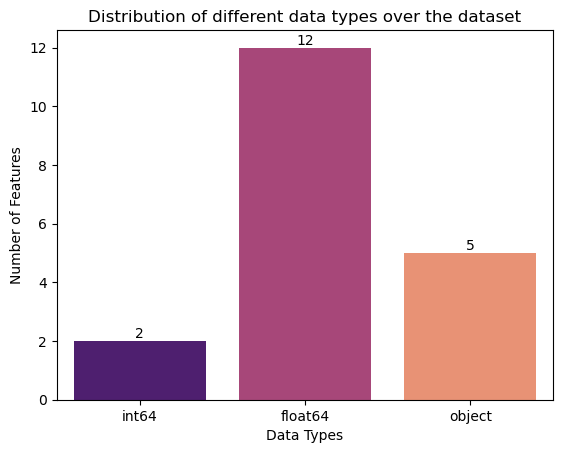

In [37]:
# Find the number of features based on their data types
data_types = ['int64', 'float64', 'object']
num_lst = [0,0,0]

for v in train_df.dtypes:
    if v == 'int64':
        num_lst[0] += 1
    elif v == 'float64':
        num_lst[1] += 1
    elif v == 'object':
        num_lst[2] += 1

# Plotting the graph showing the difference between data types
plot = sns.barplot(x = data_types, y = num_lst, palette = 'magma')

# Show value for each bar in the graph
plot.bar_label(plot.containers[0])

plt.title('Distribution of different data types over the dataset')
plt.xlabel('Data Types')
plt.ylabel('Number of Features')
plt.show()

<div class="alert alert-block alert-warning">
<b>Note: </b> 

- Dataset consists the majority of numerical features (14)
- These numerical features actually **user_id** and **CHURN** columns and we also have 3 non-numerical features

</div>

#### Histograms

In [58]:
# Import math 
import math

# Create a function to plot histogram for all features except those categorical ones
df = train_df.copy().drop(['user_id', 'REGION', 'TENURE', 'TOP_PACK', "MRG"], axis = 1)

def histogram_plot(data, idx_s, idx_e):
    temp = data.iloc[:, idx_s:idx_e]
    if 'user_id' in temp.columns:
        del temp['user_id']
        
    num_cols = temp.columns

    num_plots = len(num_cols)
    num_rows = math.ceil(num_plots / 3)

    fig, ax = plt.subplots(num_rows, 3, figsize = (16, 12))
    ax = ax.flatten()

    for idx, c in enumerate(num_cols):
        ax[idx].set_title(c)
        temp[c].hist(bins = 50, xlabelsize = 8, ylabelsize = 8, ax=ax[idx])
        ax[idx].set_ylabel('Frequency')
        ax[idx].set_xlabel('Value')
    plt.show()

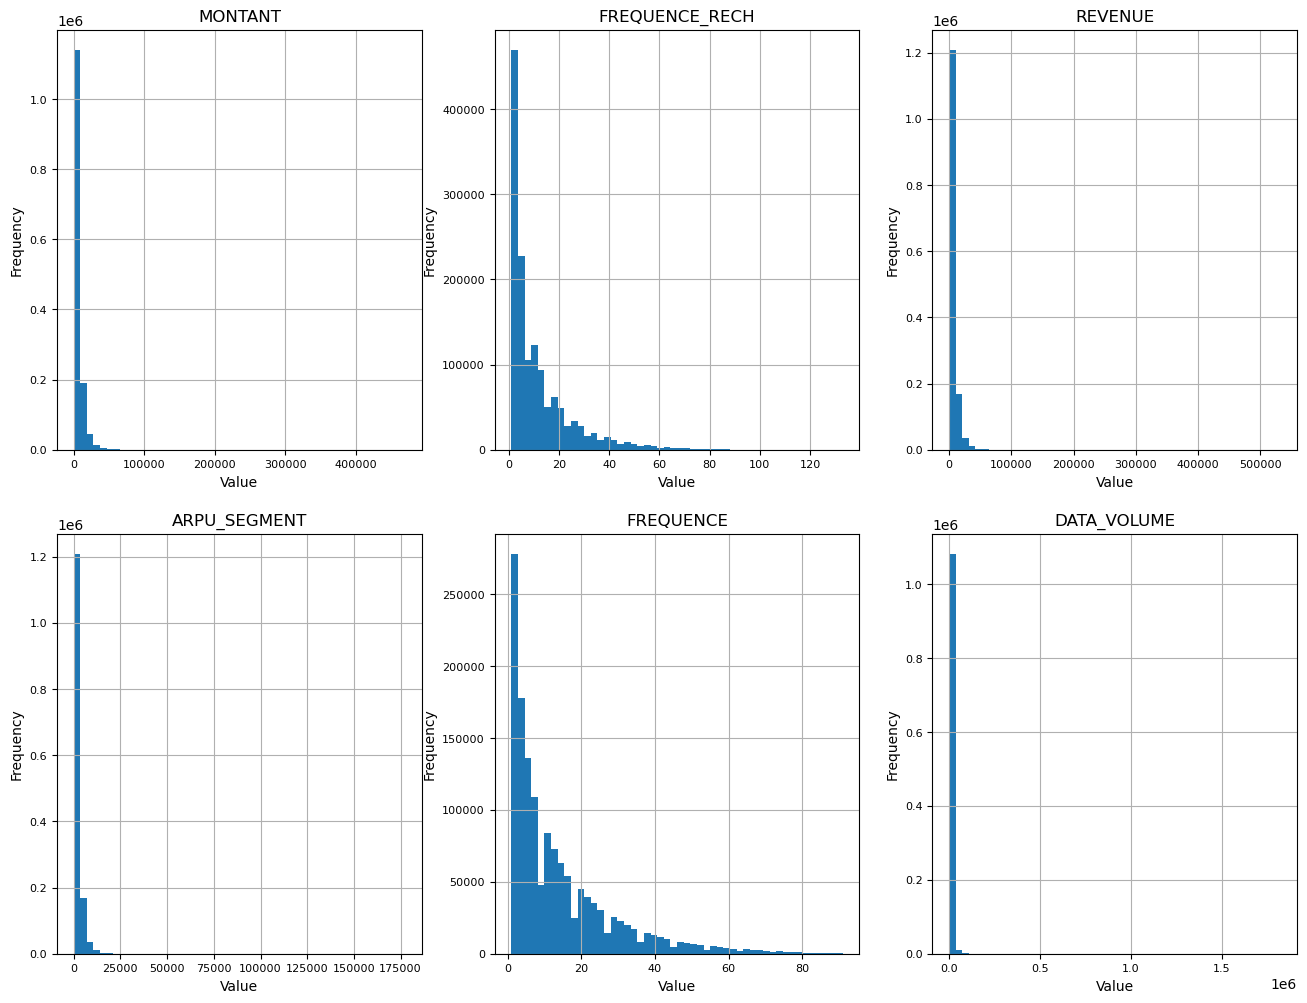

In [59]:
# Histogram Visualization for First 6 features
histogram_plot(df, 0, 6)

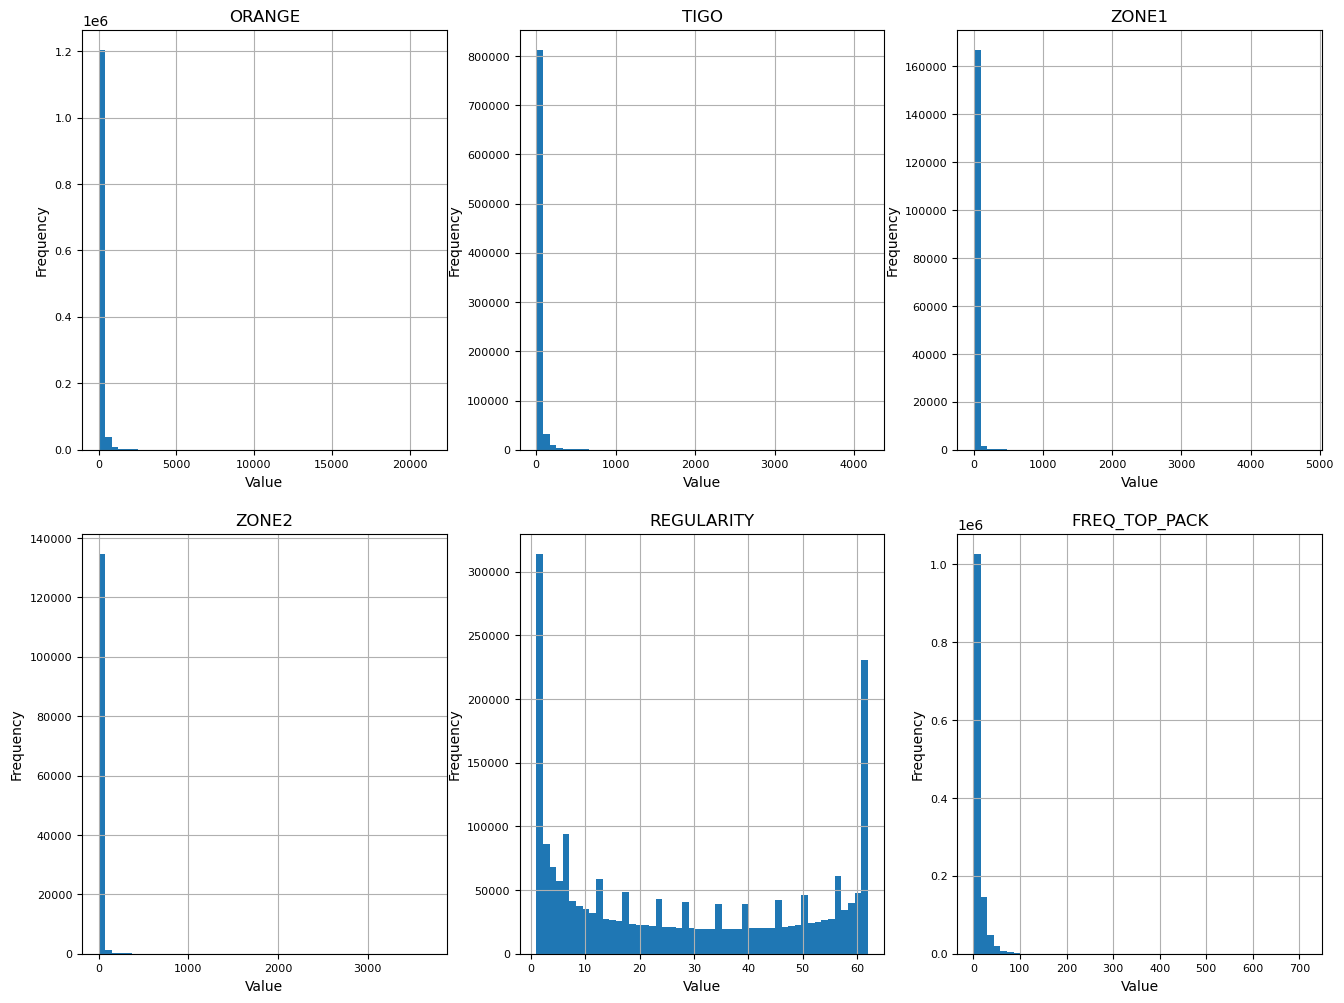

In [60]:
# Histogram Visualization for First 6 features
histogram_plot(df, 7, 13)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- MONTANT, REVENUE, DATA_VOLUME, ARPU_SEGMENT, ORANGE, TIGO, ZONE1, ZONE2, FREQ_TOP_PACK **all have the lower bound of 0 with high frequency**    
    
- FREQUENCE_RECH, FREQUENCE are **right skewed**, thus we need to perform log transformation to make it a better distrubition
</div>

#### Outliers - Box Plot

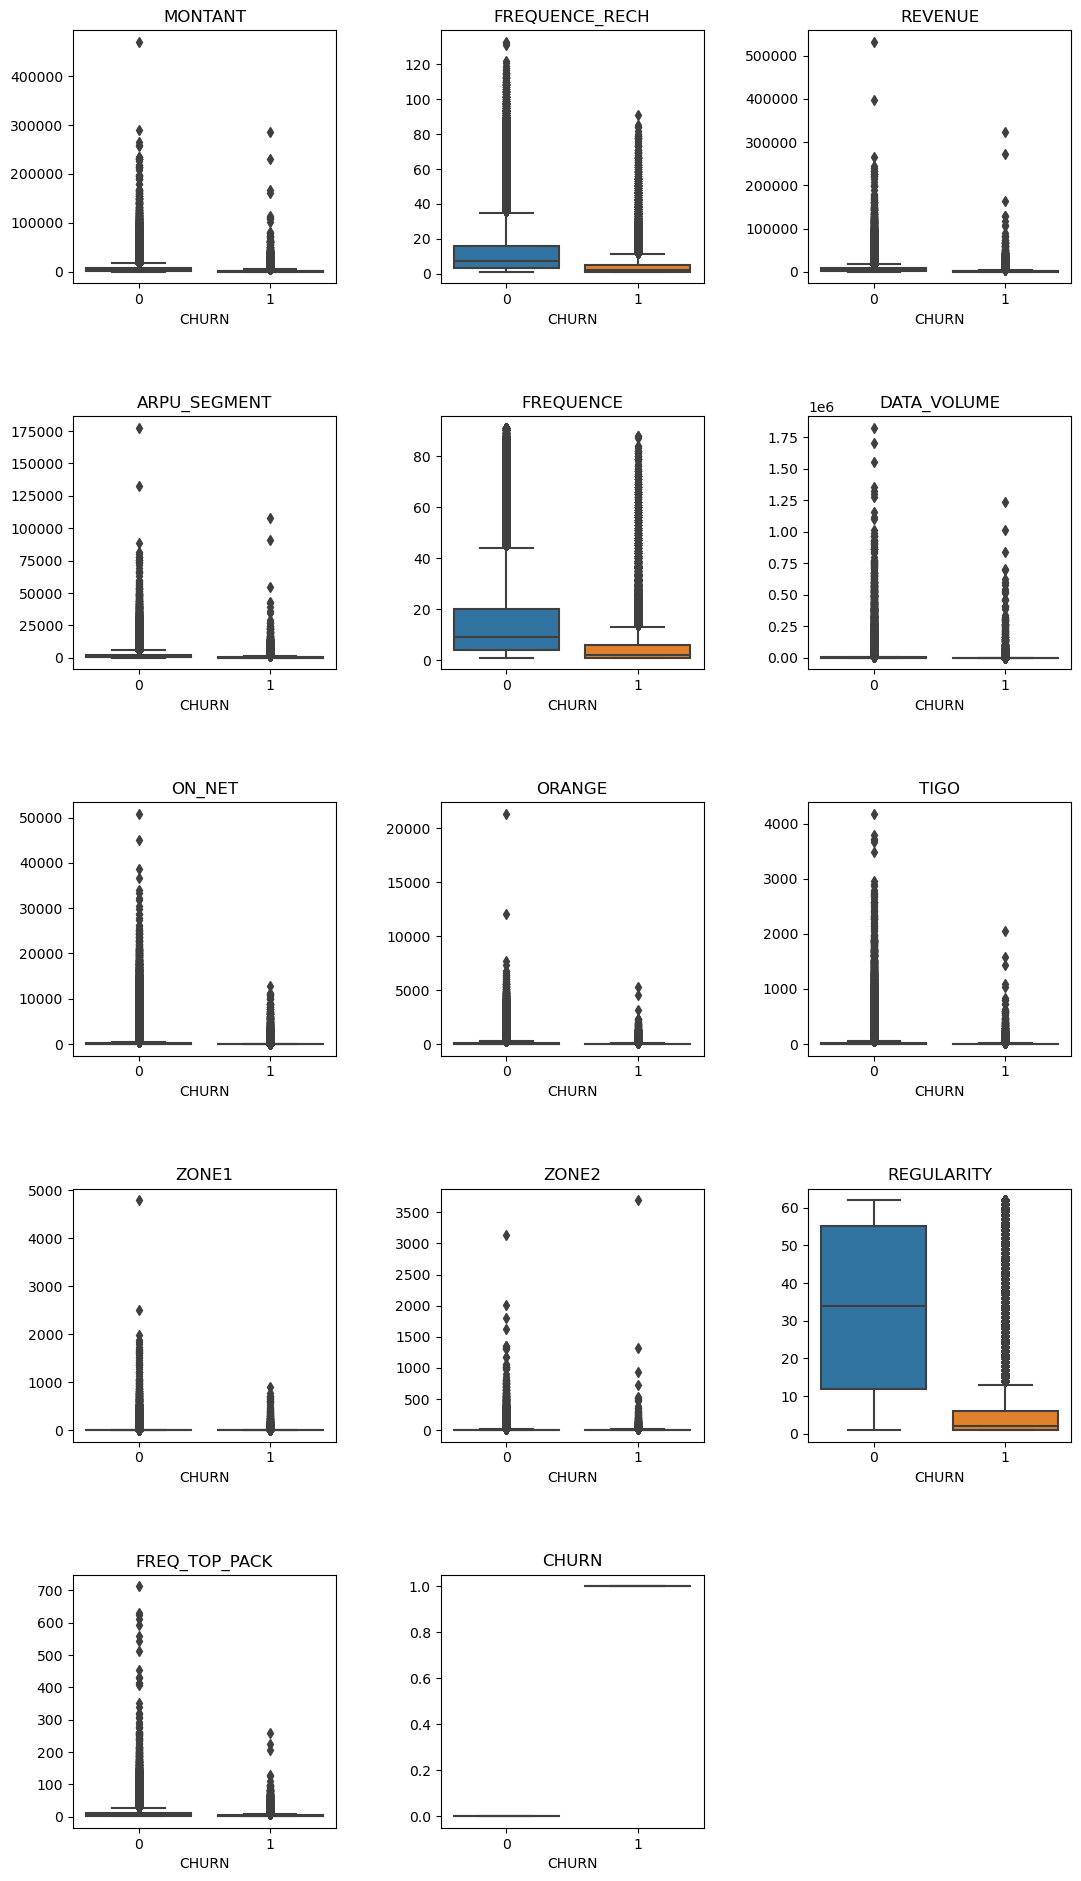

In [65]:
import math

num_cols_filtered = df.columns

num_plots = len(num_cols_filtered)
num_rows = math.ceil(num_plots / 3)

fig, ax = plt.subplots(num_rows, 3, figsize=(12, 20))
ax = ax.flatten()

for idx, c in enumerate(num_cols_filtered):
    ax[idx].set_title(c)
    sns.boxplot(x='CHURN', y=c, data=df, ax=ax[idx])
    ax[idx].set_ylabel('')

for i in range(len(num_cols_filtered), len(ax)):
    ax[i].axis('off')

plt.tight_layout(pad=5, w_pad=3, h_pad=5)  # Increase padding between subplots
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- It proves that MONTANT, REVENUE, DATA_VOLUME, ARPU_SEGMENT, ORANGE, TIGO, ZONE1, ZONE2, FREQ_TOP_PACK **all have the lower bound of 0 with high frequency**
    
- FREQUENCE_RECH, FREQUENCE are **right skewed**, indicating they have outliers.
    
- REGULARITY is one of the features that shows the difference between retained and churned target user groups.
</div>

### Groups of features Decision

#### Group 1: User's Personal Information
* REGION: customer location
* TENURE: duraton being a customer of Expresso

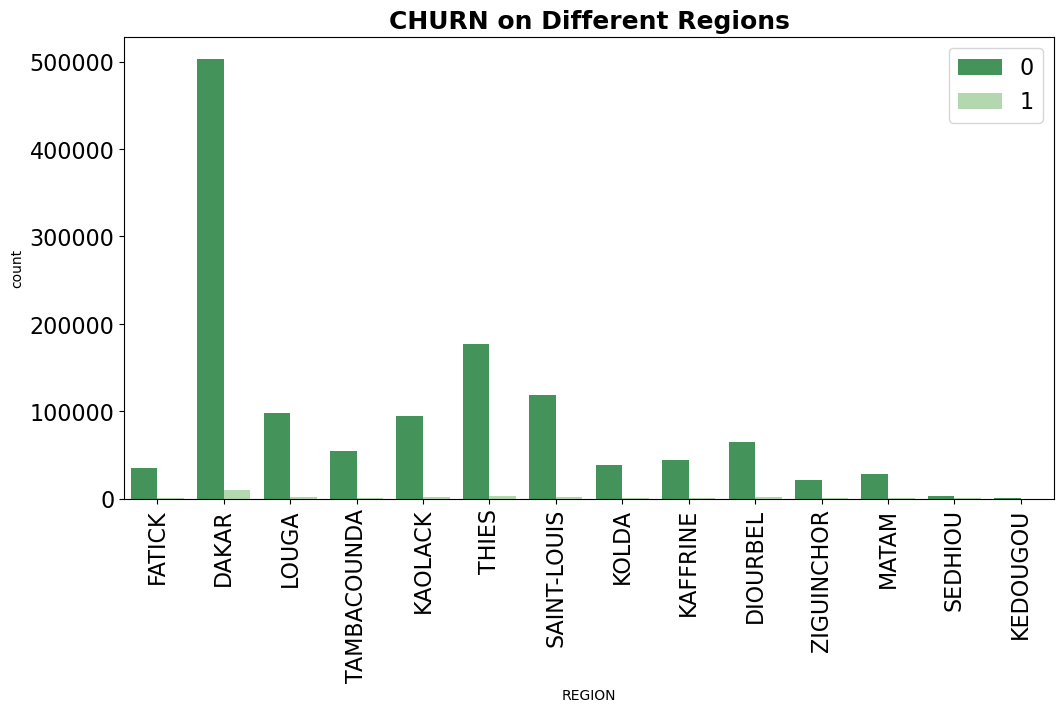

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df['REGION'], hue = train_df['CHURN'], palette='Greens_r')
plt.title('CHURN on Different Regions', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

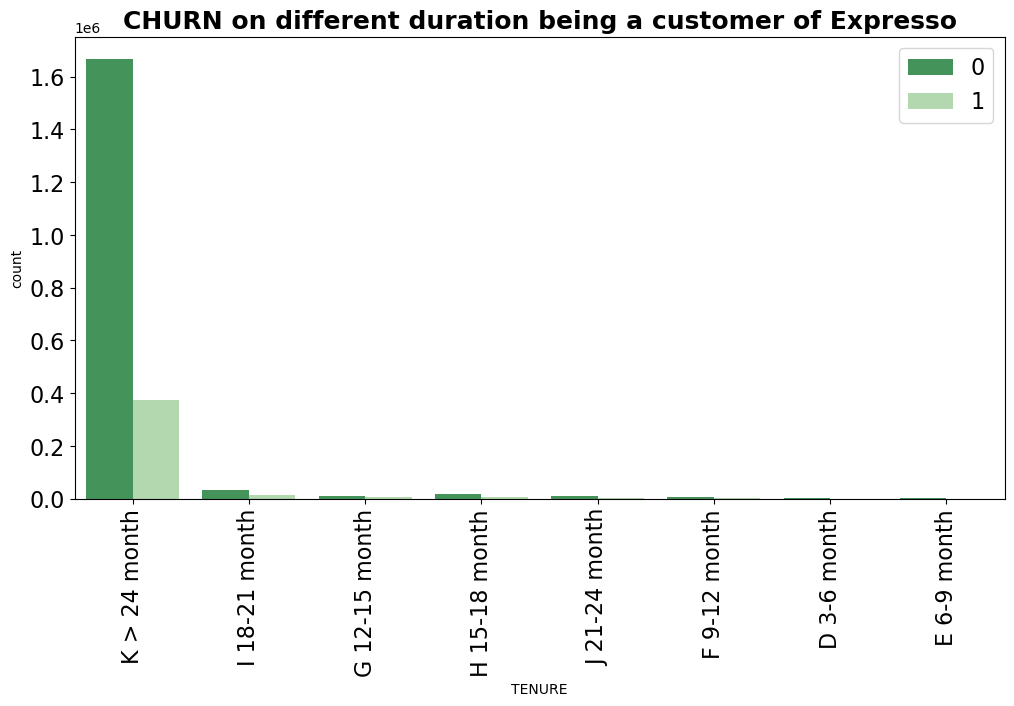

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df['TENURE'], hue = train_df['CHURN'], palette='Greens_r')
plt.title('CHURN on different duration being a customer of Expresso', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<div class="alert alert-block alert-warning">
<b>User Information : </b> 

- For REGION, we can any outstanding insights for specific regions customers would churn, but **DAKAR** is the regions having the highest number of churned users among other regions
- For TENURE - Duration of being a customer of Expresso, we can tell that users would churn after using Expresso products and services about **24 months onwards**. There would be features that users are not satisfied after that amount of time and Expresso need to take it into account for other new upcoming users. Apart from that, there is no clear difference between two groups on other categories of TENURE feature.
</div>

#### Group 2: User's Payment Records
* MONTANT: the amount of money the user has paid to the company
* FREQUENCE_RECH: number of times the customer recharges their phone account
* REVENUE: montly income generated from the customer
* ARPU_SEGMENT: average revenue per user segment / income over 90 days/3
* FREQUENCE: number of times the customer has made an income

<Axes: xlabel='MONTANT', ylabel='FREQUENCE_RECH'>

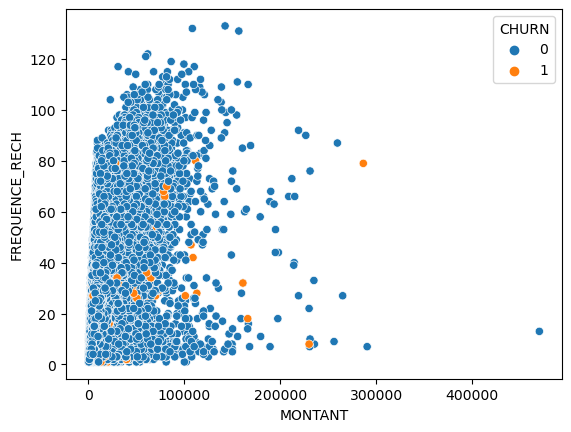

In [76]:
sns.scatterplot(data = train_df, x = 'MONTANT', y = 'FREQUENCE_RECH', hue = 'CHURN')

<Axes: xlabel='MONTANT', ylabel='REVENUE'>

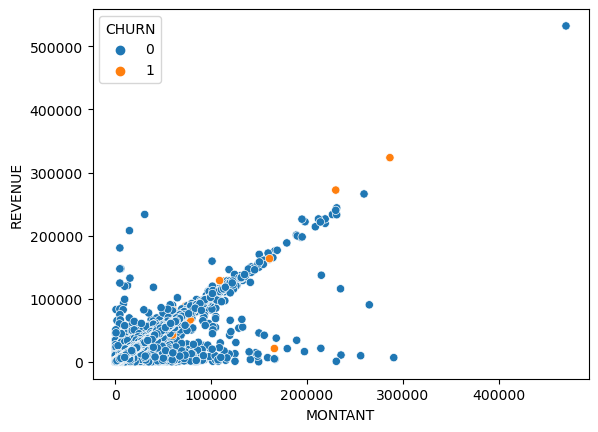

In [77]:
sns.scatterplot(data = train_df, x = 'MONTANT', y = 'REVENUE', hue = 'CHURN')

<Axes: xlabel='MONTANT', ylabel='ARPU_SEGMENT'>

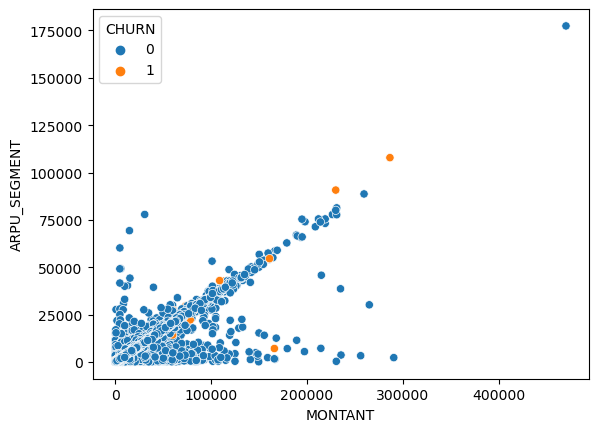

In [86]:
sns.scatterplot(data = train_df, x = 'MONTANT', y = 'ARPU_SEGMENT', hue = 'CHURN')

<Axes: xlabel='MONTANT', ylabel='FREQUENCE'>

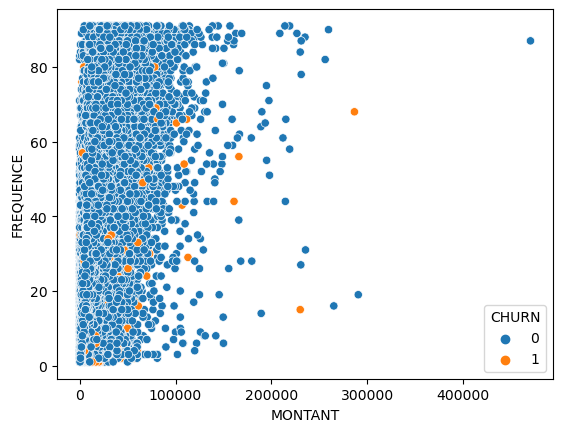

In [87]:
sns.scatterplot(data = train_df, x = 'MONTANT', y = 'FREQUENCE', hue = 'CHURN')

<div class="alert alert-block alert-warning">
<b>User's Payment Records:  </b> 

- From the user payment record, we can see that users who paid much money to the Expresso company had high montly income.
    
- Therefore, from this group of features, we should pay attention to MONTANT and REVENUE features as they will decide that users are willing to pay more money for the product or service provided by Expresso when they have high or low monthly income.
</div>

#### Group 3: User's Behaviors
* DATA_VOLUME: the amount of data used by the customer
* ON_NET: inter Expresso calls made by the user
* ORANGE: calls to Orange network
* TIGO: calls to Tigo network
* ZONE1: calls to ZONE1 network
* ZONE2: calls to ZONE2 network

<Axes: xlabel='DATA_VOLUME', ylabel='ON_NET'>

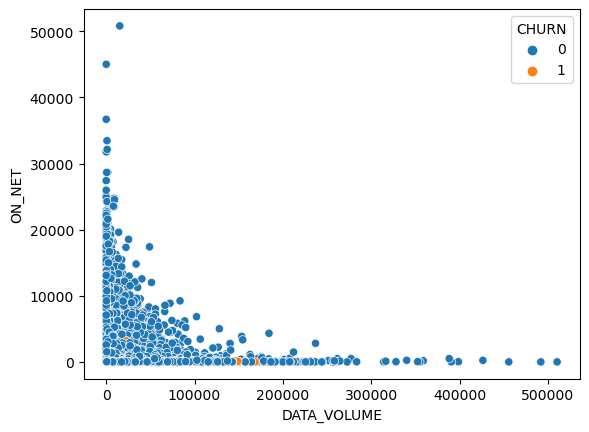

In [89]:
sns.scatterplot(data = train_df, x = 'DATA_VOLUME', y = 'ON_NET', hue = 'CHURN')

<Axes: xlabel='ON_NET', ylabel='TIGO'>

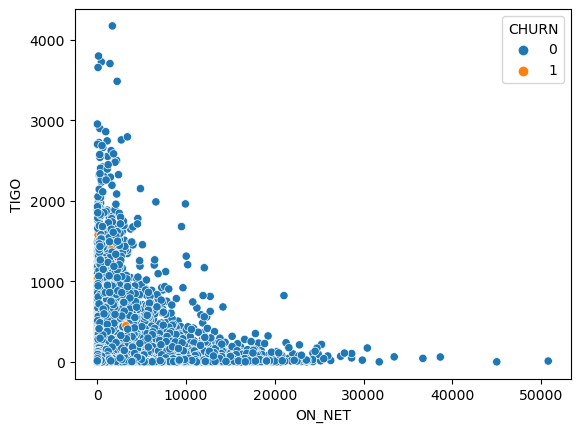

In [88]:
sns.scatterplot(data = train_df, x = 'ON_NET', y = 'TIGO', hue = 'CHURN')

<div class="alert alert-block alert-warning">
<b>User's Behaviors:  </b> 

- From the user behaviors, we can not see anything outstanding and clear on how users use Expresso services, especially when they use it to call other network. However, we can say that the amount of data **DATA_VOLUME** and the numer of inter Expresso calls **ON_NET** made by users are two important features from this group for our analysis
</div>

#### Group 4: User's Activity Indicators
* MRG: the merger status / A client who is going
* REGULARITY: number of month the customer is active for 90 days
* TOP_PACK: the most active packs
* FREQ_TOP_PACK: number of times of activating the top service package

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



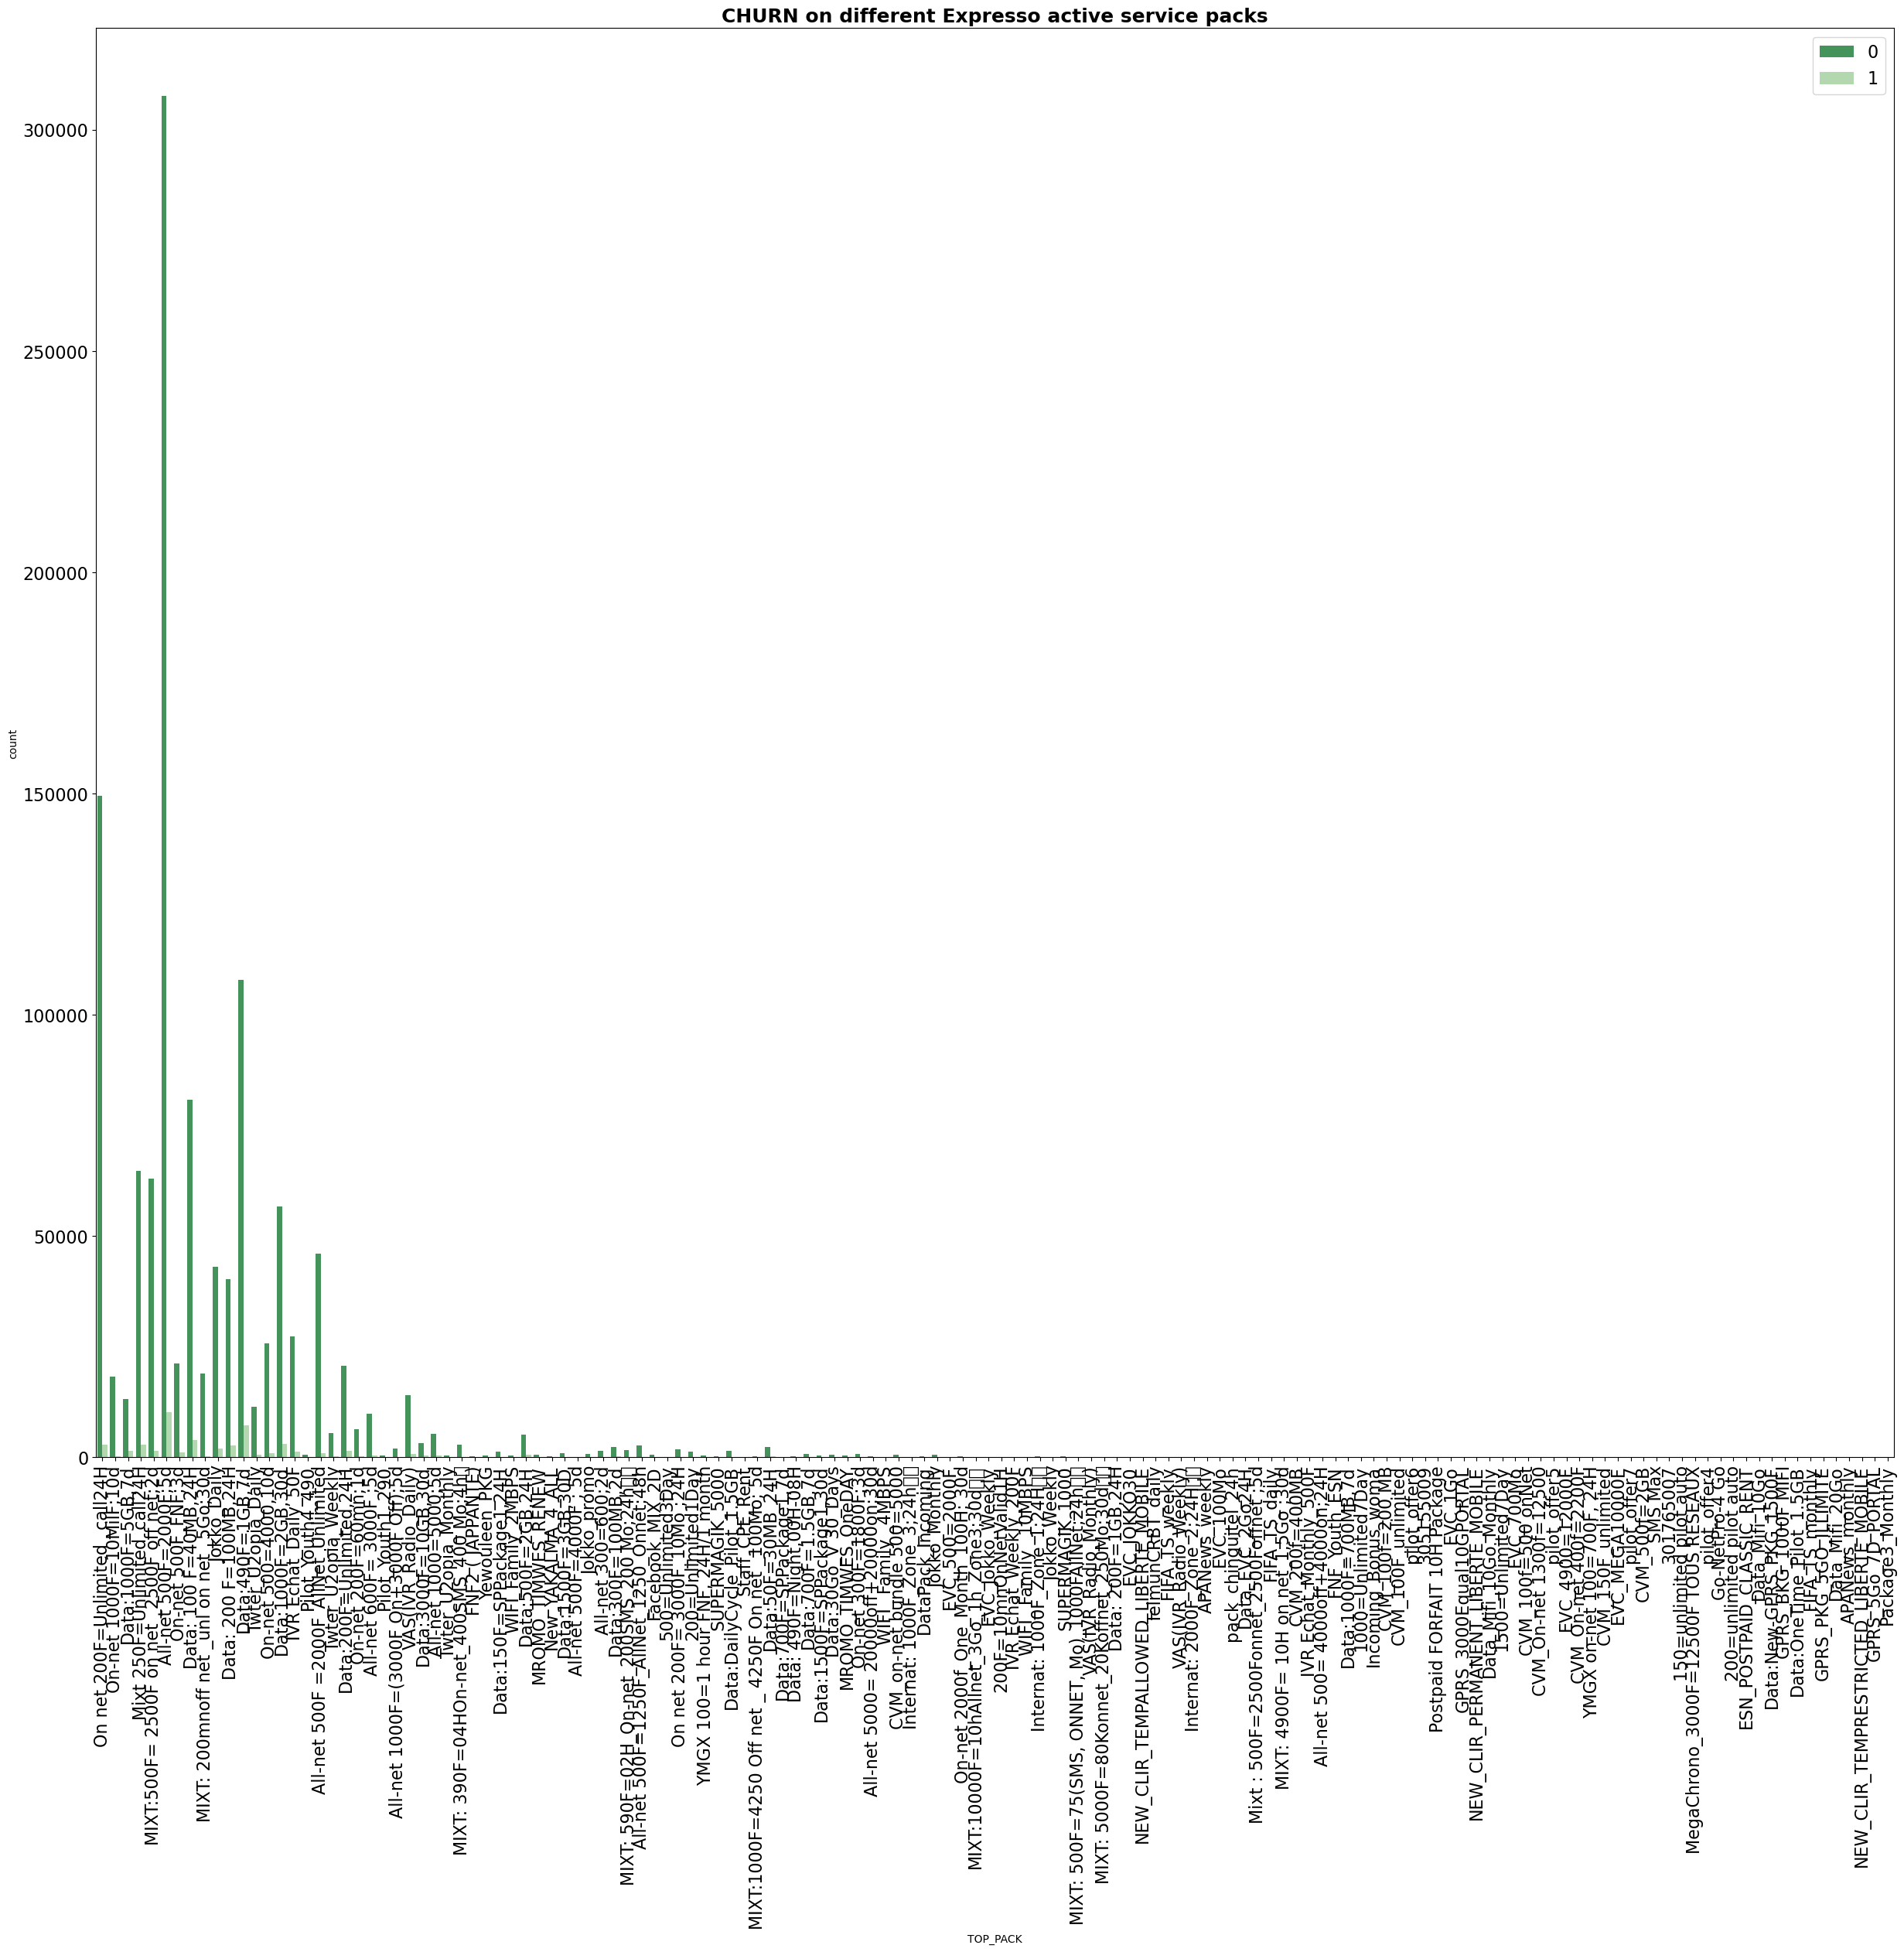

In [91]:
plt.figure(figsize=(30,24))
sns.countplot(x = train_df['TOP_PACK'], hue = train_df['CHURN'], palette='Greens_r')
plt.title('CHURN on different Expresso active service packs', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

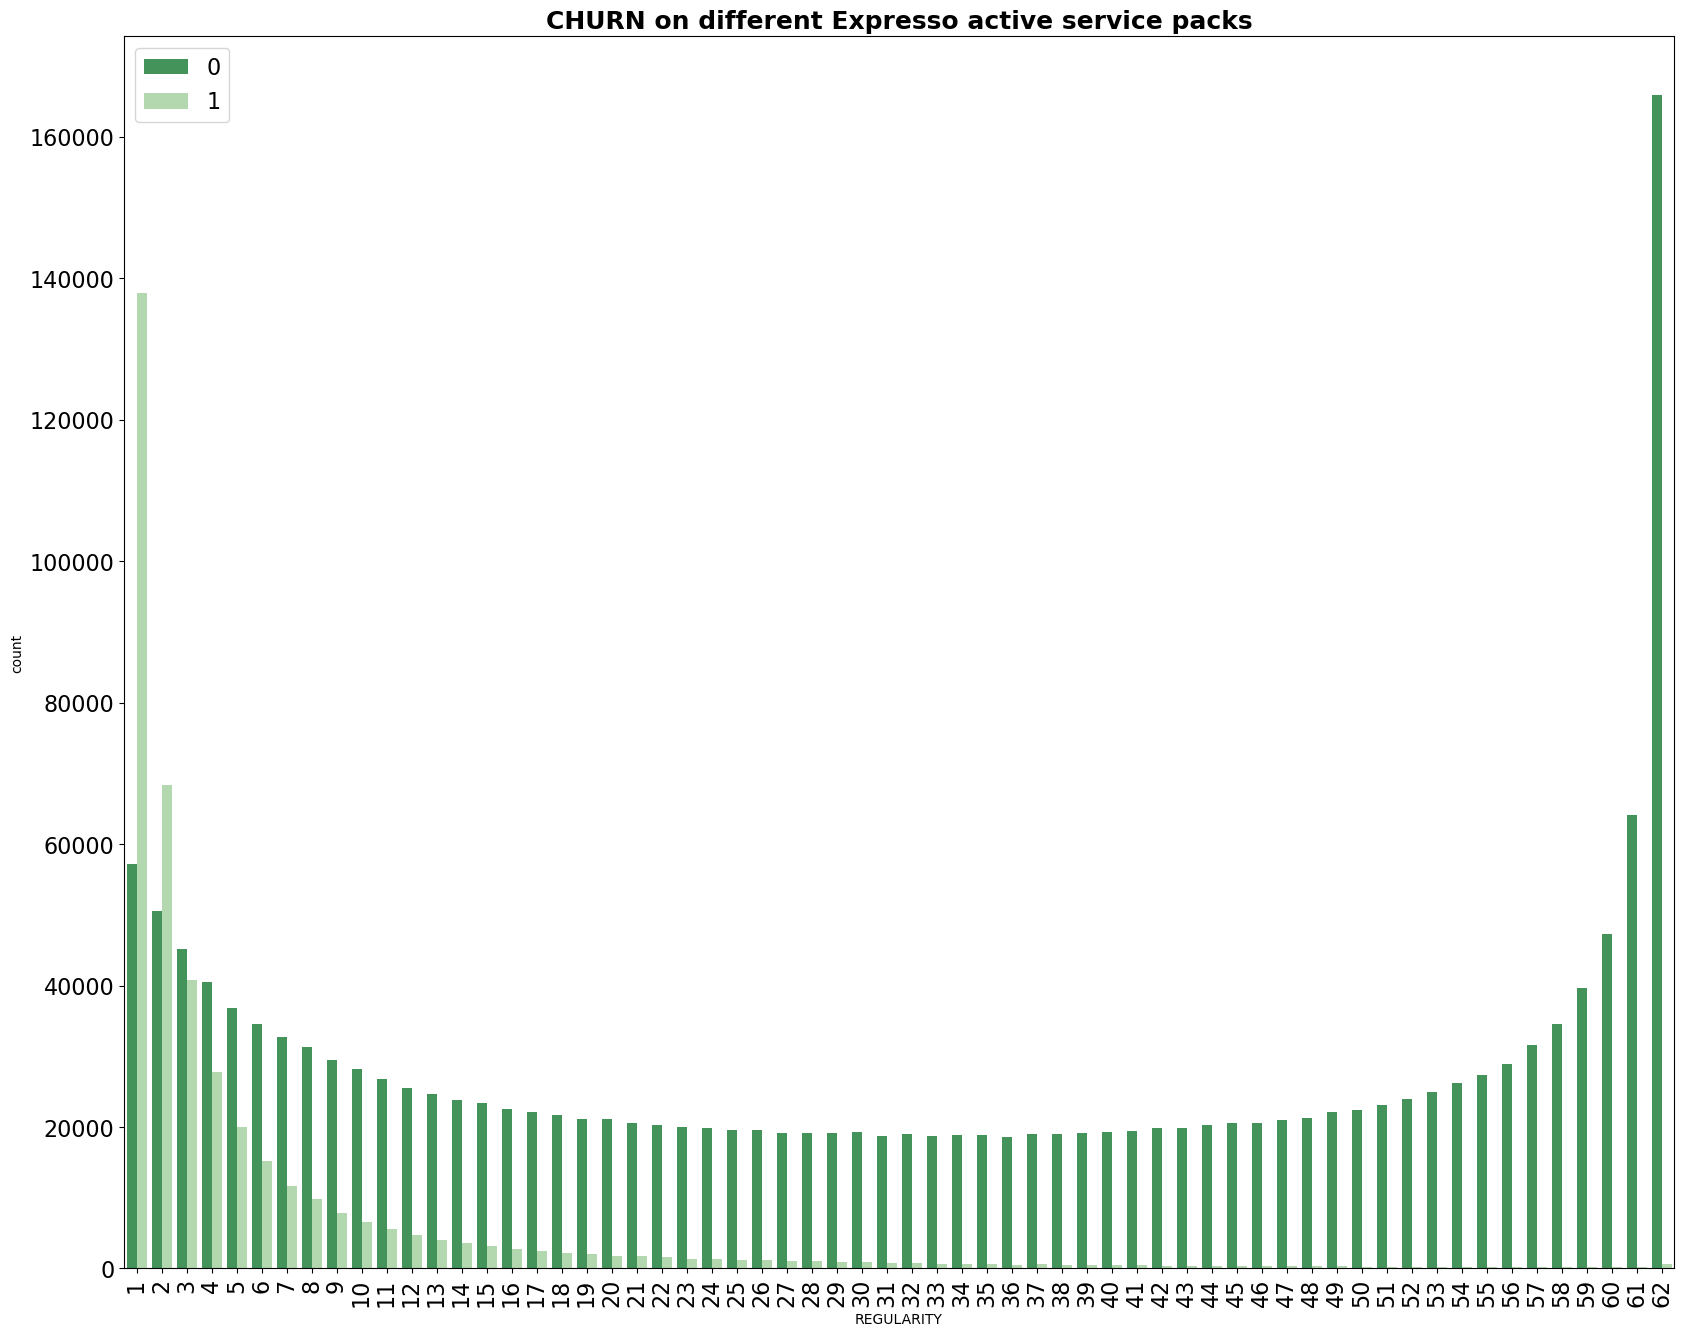

In [94]:
plt.figure(figsize=(20,16))
sns.countplot(x = train_df['REGULARITY'], hue = train_df['CHURN'], palette='Greens_r')
plt.title('CHURN on different Expresso active service packs', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<Axes: xlabel='REGULARITY', ylabel='FREQ_TOP_PACK'>

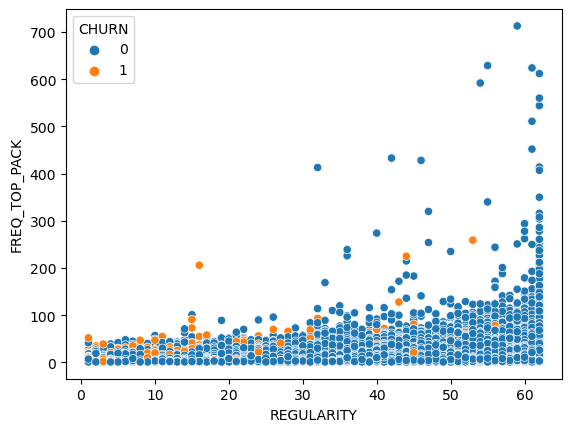

In [92]:
sns.scatterplot(data = train_df, x = 'REGULARITY', y = 'FREQ_TOP_PACK', hue = 'CHURN')

<div class="alert alert-block alert-warning">
<b>User's Behaviors:  </b> 

- From the user activity indicators, we can see that REGULARITY shows the different trends for our churned and retained groups of users. Those users who are active for the greater number of months would retain and the opposite trend applies for churned users.
    
- Apart from that, TOP_PACK - the most active Expresso packs of services also contributes to the churned-retained analysis. For exmaple, the most user-churned top 2 packs are ALL_NET 500F = 2000F 5d, DATA: 490F = 1GB 7d.
    
- We can say that **REGULARITY and TOP_PACK** are two important features from this group
</div>

## 3. Data Preprocessing
As this is part of the competition from Expresso Company, we do not have the result of labels for the test dataset. Therefore, we decided to split the train dataset into three different subsets: **Training, Validation and Test** sets.

### Train and Test Separation

In [100]:
from sklearn.model_selection import train_test_split

# Create training_data and testing_data from new_train_df
train_data, test_data = train_test_split(train_df, test_size=0.1, random_state=25)

In [101]:
# Get the shape of train_data and test_data
train_data.shape, test_data.shape

((1938643, 19), (215405, 19))

In [102]:
# Separate variables and prediction for train_data
y = train_data['CHURN']
X = train_data.drop(['CHURN'], axis = 1)

In [103]:
# Separate variables and prediction for test_data
y_test = test_data['CHURN']
x_test = test_data.drop(['CHURN'], axis = 1)

### Data Preprocessing

In [105]:
from sklearn.preprocessing import LabelEncoder

# Create a defined function to do some preprocessing tasks
skewed_cols = ['FREQUENCE_RECH', 'FREQUENCE']
categ_cols = ['MRG', 'TENURE', 'REGION', 'TOP_PACK']

def preprocess_data(df, skewed_cols, categ_cols):
    
    # Replace numeric NaN with mean
    for column in df.select_dtypes(include=[np.number]).columns: 
        df[column].fillna(df[column].mean(), inplace=True)

    # Replace categories with most popular values 
    for column in df.select_dtypes(include=["object"]).columns: 
        df[column].fillna(df[column].mode().iloc[0], inplace=True)

    # Check and drop duplicates
    df = df.drop_duplicates()
    
    # Drop the 'user_id' column, if it exists
    df = df.drop(['user_id'], axis=1, errors='ignore')
    
    # Apply Log Transformation for right-skewed featues
    for v in skewed_cols:
        df[v] = np.log1p(df[v])
        
    # Label Encoding
    le = LabelEncoder()
    for i in categ_cols:
        df[i] = le.fit_transform(df[i])

    return df

In [107]:
# Create numerical pipeline to transform numerical values
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler

#Convert the non transformed Dataframe into list.
columns_numerical_list = train_df.drop(['user_id', 'REGION', 'TENURE', 'TOP_PACK', 'MRG', 'CHURN'], axis = 1).columns

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
    ("numerical", pipeline_numerical, columns_numerical_list),
])

In [108]:
# A full pipeline for numerical features
pipeline_full = ColumnTransformer([
    
    # Transform those numerical features
    ("numerical", pipeline_numerical, columns_numerical_list)],
    
    # Any other columns are ignored
    remainder="passthrough"
)

In [110]:
# Data Preprocessing for train_data and test_data
train_data = preprocess_data(train_data, skewed_cols, categ_cols)
test_data = preprocess_data(test_data, skewed_cols, categ_cols)

### Correlation Matrix for preprocess_train_data

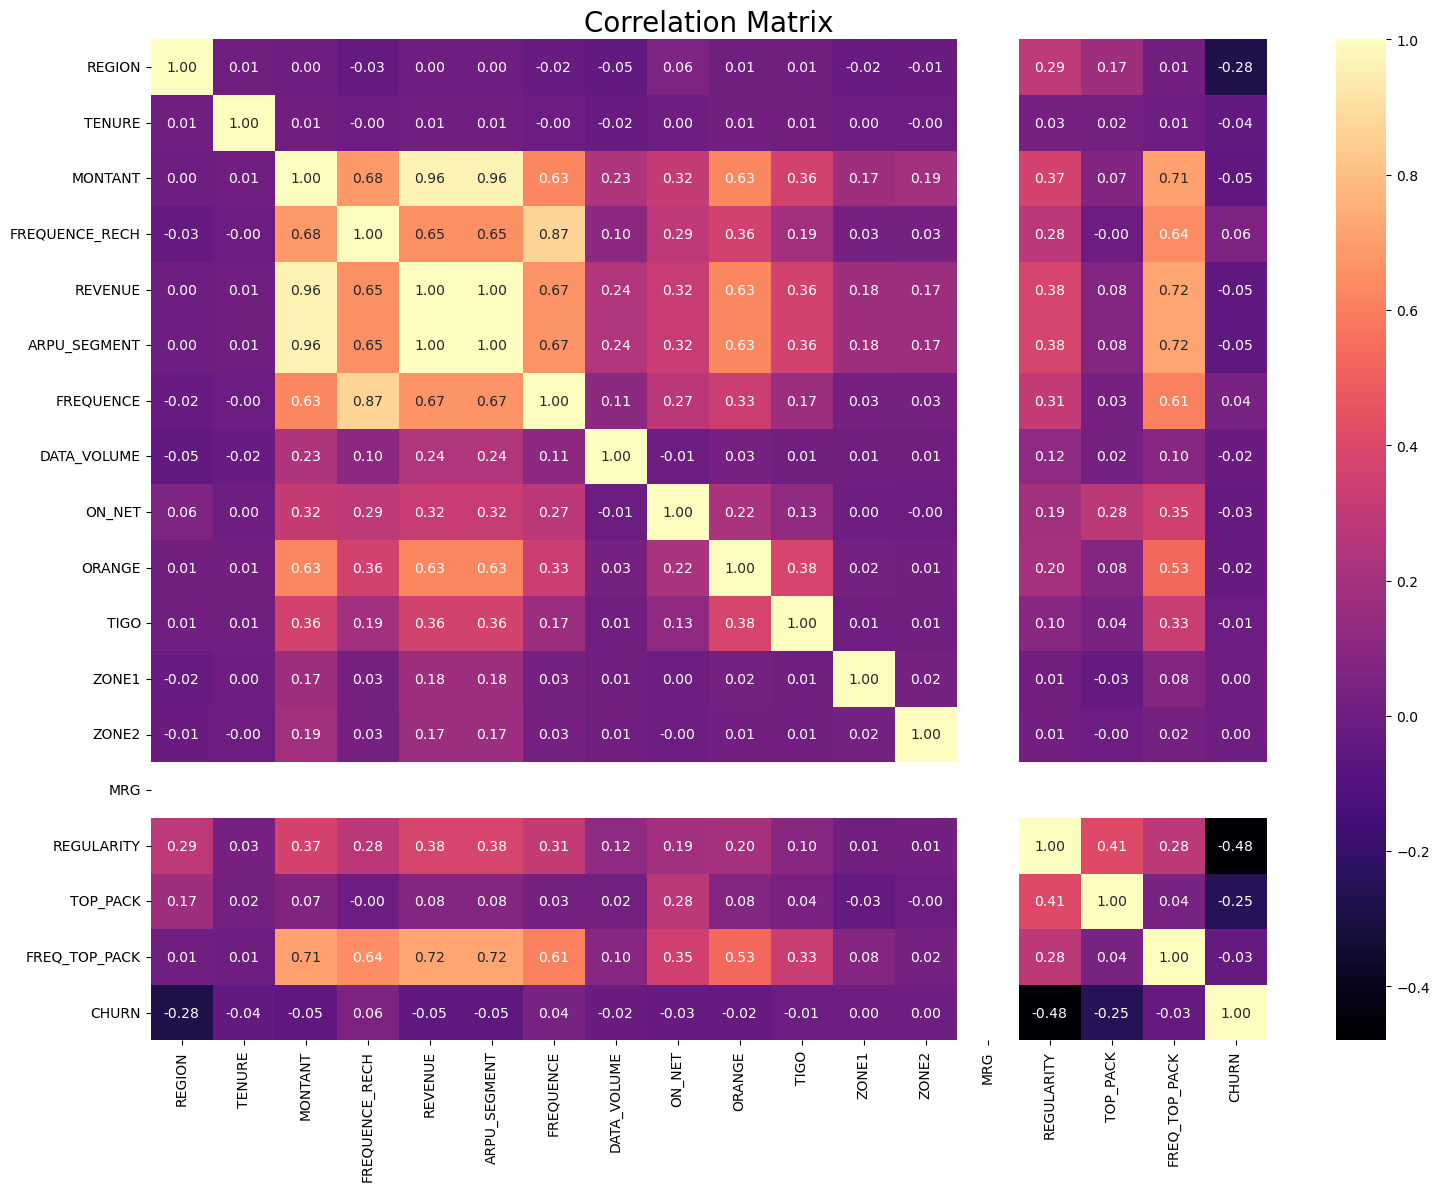

In [112]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<div class="alert alert-block alert-warning">
<b>Correlation Observation:  </b> 

- From this heatmap, we can see that three negative-correlated features to our churn target are **REGULARITY, TOP_PACK and REGION**, which is proved that our Deep EDA on each group of features regarding the differen user's aspects works pretty well. With only these three features, it could help but not enough and we might lose interesting insights from other features. Thus, we decided to carry on the analysis to the model building part with all features included.
</div>

In [114]:
### Separate X, y from train_data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1000)
print(f"X_train.shape: {x_train.shape}")
print(f"X_test.shape: {x_val.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_val.shape}")

X_train.shape: (1550914, 18)
X_test.shape: (387729, 18)
y_train.shape: (1550914,)
y_test.shape: (387729,)


In [115]:
# Apply data_preprocessing on x_train, x_val, x_test to not give bias to our model's result
# Then fit them in the pipeline_full

x_train = preprocess_data(x_train, skewed_cols, categ_cols)
pipeline_full.fit(x_train)
x_train = pd.DataFrame(pipeline_full.transform(x_train), columns=pipeline_full.get_feature_names_out())

x_val = preprocess_data(x_val, skewed_cols, categ_cols)
pipeline_full.fit(x_val)
x_val = pd.DataFrame(pipeline_full.transform(x_val), columns=pipeline_full.get_feature_names_out())

x_test = preprocess_data(x_test, skewed_cols, categ_cols)
pipeline_full.fit(x_test)
x_test = pd.DataFrame(pipeline_full.transform(x_test), columns=pipeline_full.get_feature_names_out())

In [116]:
print(f"X_train transformed.shape: {x_train.shape}")
print(f"X_val transformed.shape: {x_val.shape}")
print(f"X_test transformed.shape: {x_test.shape}")

X_train transformed.shape: (1550914, 17)
X_val transformed.shape: (387729, 17)
X_test transformed.shape: (215405, 17)


In [124]:
print(f"y_train transformed.shape: {y_train.shape}")
print(f"y_val transformed.shape: {y_val.shape}")
print(f"y_test transformed.shape: {y_test.shape}")

y_train transformed.shape: (1550914,)
y_val transformed.shape: (387729,)
y_test transformed.shape: (215405,)


## 4. Data Modeling - A Classification Problem

In [133]:
# Defining a class for different predictive models to avoid code repetition.
class predictive_models:
    def __init__(self, x_train, x_val, y_train, y_val):
        self.x_train = x_train
        self.x_val = x_val
        self.y_train = y_train
        self.y_val = y_val
    
    # Let's define a function for plotting feature importances for each differnt model.
    def feat_importance(self, model, title):
        def plot_importance(model, features, num=len(self.x_train)):
                plt.figure(figsize=(7, 7))
                sns.set(font_scale=1)
                sns.barplot(x="Value", y="Feature", data=features.sort_values(by="Value", ascending=False)[0:num])
                plt.title(title)
                plt.tight_layout()
                plt.show()

        features = self.x_train.columns
        importances = model.feature_importances_

        feat_importances = pd.DataFrame()
        feat_importances['Feature'] = features
        feat_importances['Value'] = importances

        # Call the plot_importance function
        plot_importance(model, feat_importances)

        # Print fancy table
        sorted_feat_importances = feat_importances.sort_values('Value', ascending=False)
        # print(tabulate(sorted_feat_importances, headers='keys', tablefmt='pretty', showindex=False))
    
    # Let's define a function to visualise, learning curves for each model
    def learning_curve(self, model):
      
        from sklearn.model_selection import learning_curve, validation_curve

        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

        # Calculate mean and standard deviation for training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve
        plt.figure()
        plt.title("Learning Curve")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    # Let's define a function to plot ROC curve for each model
    def ROC_curve(self, model, y_pred_curve, title):
        
        from sklearn.metrics import roc_curve


        fpr, tpr, _ = roc_curve(y_val, y_pred_curve)
        f1 = f1_score(y_val, y_pred_curve)

        plt.figure(figsize=(9, 5))
        plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_val, y_pred_curve):.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
    
    # Lets define a function that lets us train a logistic regression model and retrieve it as well if needed.
    def logisticregression(self, want_model = 'No'):
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import roc_auc_score
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

        lr_model = LogisticRegression()

        lr_model = LogisticRegression()
        lr_model.fit(self.x_train, self.y_train)
        y_prob_lr = lr_model.predict(self.x_val)

        print("Precision Score with LR: ", precision_score(self.y_val, y_prob_lr))
        print("Recall Score with LR: ", recall_score(self.y_val, y_prob_lr))
        print("F1 Score Score with LR: ", f1_score(self.y_val, y_prob_lr))
        print("Accuracy Score with LR: ", accuracy_score(self.y_val, y_prob_lr))
        print("ROC with Logistic Regression:", roc_auc_score(self.y_val, y_prob_lr))
        
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(lr_model, y_prob_lr, title = 'ROC curve for Logistic Regression')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(lr_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return lr_model
        
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.
    def RandomforestClassifier(self, feat_imp = 'yes', bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, want_model = 'No'):
        from sklearn.ensemble import RandomForestClassifier 

        rfr_model = RandomForestClassifier(bootstrap = bootstrap,
                             max_depth=max_depth,
                             max_features=max_features,
                             min_samples_leaf= min_samples_leaf,
                             min_samples_split= min_samples_split,
                             n_estimators= n_estimators)
        rfr_model.fit(self.x_train,self.y_train)

        y_prob_rfr = rfr_model.predict(self.x_val)

        print("Precision Score with RandomForest: ", precision_score(self.y_val, y_prob_rfr))
        print("Recall Score with RandomForest: ", recall_score(self.y_val, y_prob_rfr))
        print("F1 Score Score with RandomForest: ", f1_score(self.y_val, y_prob_rfr))
        print("Accuracy Score with RandomForest: ", accuracy_score(self.y_val, y_prob_rfr))
        print("ROC by RandomForest:",roc_auc_score(self.y_val,y_prob_rfr))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for Random Forest Classifier'
            self.feat_importance(rfr_model,title)
        # Calling ROC_curve function to visulaise ROC curve    
        self.ROC_curve(rfr_model, y_prob_rfr, title = 'ROC curve for Random Forest')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(rfr_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return rfr_model
    
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.   
    def AdaBoostClassifier(self, feat_imp = 'yes', learning_rate=1, n_estimators= 50, want_model = 'No'):
        from sklearn.ensemble import AdaBoostClassifier

        AB_model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators= n_estimators, random_state=2022)
        AB_model.fit(self.x_train,self.y_train)

        y_prob_AB = AB_model.predict(self.x_val)

        print("Precision Score with AdaBoost: ", precision_score(self.y_val, y_prob_AB))
        print("Recall Score with AdaBoost: ", recall_score(self.y_val, y_prob_AB))
        print("F1 Score Score with AdaBoost: ", f1_score(self.y_val, y_prob_AB))
        print("Accuracy Score with AdaBoost: ", accuracy_score(self.y_val, y_prob_AB))
        print("ROC by AdaBoost:",roc_auc_score(self.y_val,y_prob_AB))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for AdaBoost Classifier'
            self.feat_importance(AB_model,title)
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(AB_model, y_prob_AB, title = 'ROC curve for AdaBoost')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(AB_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return AB_model
    
    def GBClassifier(self, feat_imp = 'yes', learning_rate= 0.1, max_depth= 3, n_estimators= 100, want_model = 'No'):
        from sklearn.ensemble import GradientBoostingClassifier
        GBDT_model = GradientBoostingClassifier(learning_rate= learning_rate, max_depth= max_depth, n_estimators= n_estimators, random_state=2022)
        GBDT_model.fit(self.x_train,self.y_train)

        y_prob_GBDT = GBDT_model.predict(self.x_val)
        print("Precision Score with GBC: ", precision_score(self.y_val, y_prob_GBDT))
        print("Recall Score with GBC: ", recall_score(self.y_val, y_prob_GBDT))
        print("F1 Score Score with GBC: ", f1_score(self.y_val, y_prob_GBDT))
        print("Accuracy Score with GBC: ", accuracy_score(self.y_val, y_prob_GBDT))
        print("ROC by GBC:",roc_auc_score(self.y_test,y_prob_GBDT))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for GB Classifier.'
            self.feat_importance(GBDT_model,title)
            
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(GBDT_model, y_prob_GBDT, title = 'ROC curve for Gradient Boosting')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(GBDT_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return GBDT_model

        
    def XGB(self, feat_imp = 'yes', base_score=0.5,booster = 'gbtree',gamma= 0,learning_rate= 0.1,n_estimators= 100,reg_alpha= 0,reg_lambda= 1, want_model = 'No'):
        import xgboost as xgb
        from sklearn.metrics import roc_auc_score

        XGB_model = xgb.XGBClassifier(base_score=base_score,
                                         booster = booster,
                                         gamma= gamma,
                                         learning_rate= learning_rate,
                                         n_estimators= n_estimators,
                                         reg_alpha= reg_alpha,
                                         reg_lambda= reg_lambda)
        XGB_model.fit(self.x_train, self.y_train)
        y_prob_xgb = XGB_model.predict(self.x_val)

        print("Precision Score with XGB: ", precision_score(self.y_val, y_prob_xgb))
        print("Recall Score with XGB: ", recall_score(self.y_val, y_prob_xgb))
        print("F1 Score Score with XGB: ", f1_score(self.y_val, y_prob_xgb))
        print("Accuracy Score with XGB: ", accuracy_score(self.y_val, y_prob_xgb))
        print("ROC by XGB:", roc_auc_score(self.y_val, y_prob_xgb))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            
            title = 'Feature Importance for GB Classifier.'
            self.feat_importance(XGB_model,title)
            
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(XGB_model, y_prob_xgb, title = 'ROC curve for XGB')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(XGB_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return XGB_model

### **5.1 Predict with LogisticRegression**
Logistic Regression: predicts probability of outcome using linear function.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Precision Score with LR:  0.6335065545516269
Recall Score with LR:  0.6674875153049292
F1 Score Score with LR:  0.6500532566972809
Accuracy Score with LR:  0.8652692989175429
ROC with Logistic Regression: 0.7891954463269186


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\

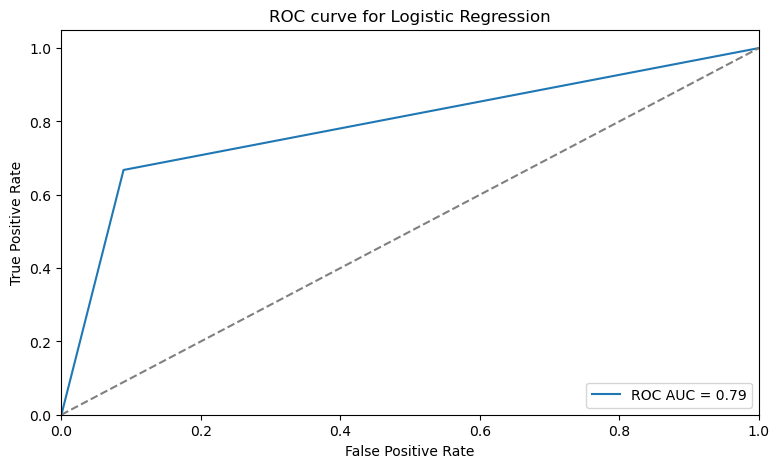

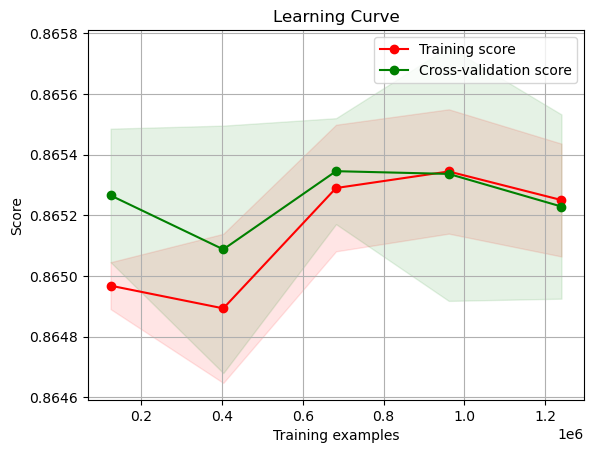

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
LR_Obj = predictive_models(x_train, x_val, y_train, y_val)
LR_Obj.logisticregression()

### RandomForest Classifier

Precision Score with RandomForest:  0.6583775029446407
Recall Score with RandomForest:  0.6151824897852495
F1 Score Score with RandomForest:  0.6360474791798534
Accuracy Score with RandomForest:  0.8680134836445043
ROC by RandomForest: 0.7707657624142094


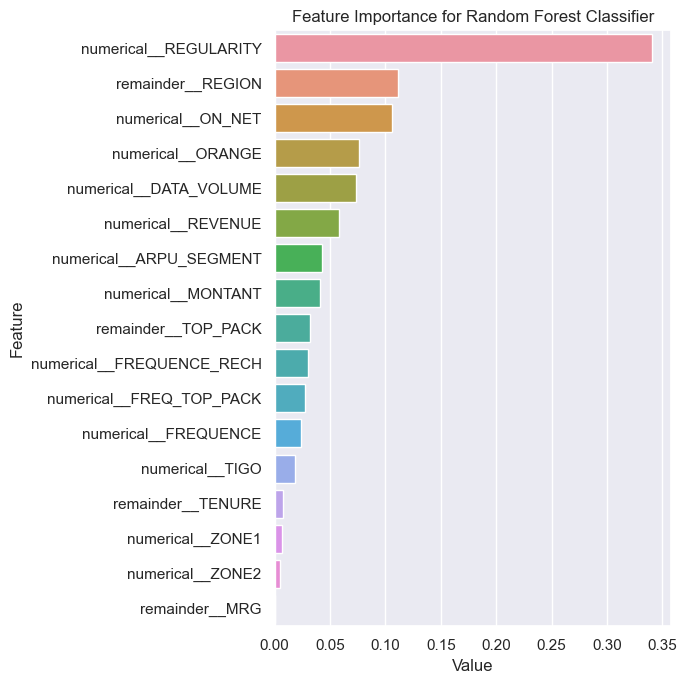

In [ ]:
LR_Obj.RandomforestClassifier()

In [ ]:
LR_Obj.GBClassifier()

In [ ]:
LR_Obj.XGB()